In [342]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import atn.ATN as ATN
import tool.common as cm
import mnist_attak.train_cnn
import atn_train
sigmoid_norm = atn_train.sigmoid_norm
CNN_1 = mnist_attak.train_cnn.CNN_1
CNN_2 = mnist_attak.train_cnn.CNN_2
nn = torch.nn
_, __, x_test, y_test = cm.load_data('mnist')
del _
del __
import gc
gc.collect()

26370

## File name convention:
Two different kinds of GATN (GATN_FC/GATN_CONV), two different kinds of CNN (CNN_1/CNN_2), ten differnet target, in total 40 models

for example, 'GatnFC_mnistCNN_1_target7' is GatnFC trained on MNIST of classifer type CNN_1 and target 7

to see the result, please follow instruction below:

#### 1. specify what mnist classifer you want to attack
change following code
```python
CNN_FILE_PATH = 'data/mnist_CNN_1_model_params.pkl' # if you attack CNN_2, change 1 to 2
cnn_mnist = CNN_1() # if you attack CNN_2, change 1 to 2
```
#### 2. specify the Gatn you used to attack
```python
ATN_FILE_PATH = 'data/GatnFC_mnistCNN_1_target8.parameter' 
# if you attack CNN_1, change CNN_1 to CNN_2
# change the target number to one of 0-9 you with to attack BOTH in the FILE_PATH and target
target = 8
# by now only GatnFC is uploaded so need not choose between GatnFC or GatnConv
```
#### 3. change idx below and start exploring
the idx should be a number in 0-9999, naming one of MNIST test set example

In [343]:
# loading 
CNN_FILE_PATH = 'data/mnist_CNN_2_model_params.pkl'
cnn_mnist = CNN_2()
cnn_mnist.load_state_dict(torch.load(CNN_FILE_PATH))

ATN_FILE_PATH = 'data/GatnFC_mnistCNN_2_target7.parameter'
atn = ATN.GATN_FC()
atn.load_state_dict(torch.load(ATN_FILE_PATH))
target = 7

# calculating accuracy and target rate
x_test_grad = atn_train.cal_grad_target(x_test, cnn_mnist, target)
x_adv_test = atn(x_test, x_test_grad)
y_pred = cnn_mnist(x_adv_test)
acc, targetrate = atn_train.accuracy(y_pred, y_test, target)
print('|test accuracy:%.4f' % acc, '|target rate:%.4f' % targetrate)

|test accuracy:0.1693 |target rate:0.9166


In [352]:
idx = 668

### This is original image and original output class

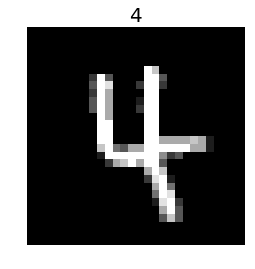

In [353]:
x_original = x_test[idx].reshape(1,1,28,28)

before_pro = cnn_mnist(x_original)
cm.imshow(x_original, torch.argmax(before_pro,dim=1).item())

### This is adversarial image and attacked output class

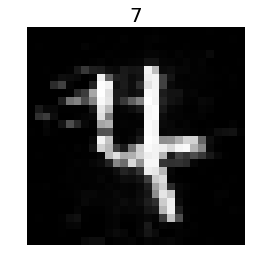

original probability tensor:  tensor([[ 2.4274e-06,  9.1034e-06,  2.7141e-06,  3.7044e-08,  9.9990e-01,
          2.2565e-06,  1.5485e-05,  8.1589e-06,  5.9056e-06,  5.3873e-05]])
adversarial probability tensor:  tensor([[ 5.9005e-05,  1.6141e-02,  4.1284e-02,  3.1927e-04,  3.3594e-02,
          7.9915e-06,  6.0153e-06,  9.0852e-01,  4.7965e-05,  2.6382e-05]])


In [354]:
x_grad = atn_train.cal_grad_target(x_original, cnn_mnist, target)
x_adv = atn(x_original, x_grad)
#x_adv = atn(x_original) 
x_adv_detach = x_adv.detach()


after_pro = cnn_mnist(x_adv)
cm.imshow(x_adv_detach,torch.argmax(after_pro,dim=1).item())
print("original probability tensor: ", before_pro)
print("adversarial probability tensor: ", after_pro )
#print("reranking function", atn_train.reranking(sigmoid_norm(cnn_mnist(x_original)),1, 11) )

### This show the perturbation on the image

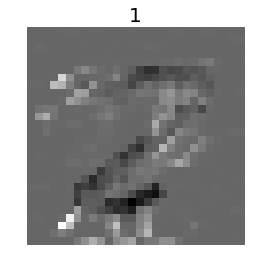

In [340]:
cm.imshow( x_adv_detach - x_original, 1)

## If you have time, you can help write a function that can plot many images at the same time...